In [1]:
import tensorflow as tf
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from math import pow
import pandas as pd
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train = X_train.reshape(len(X_train), -1)
y_train = y_train.reshape(len(y_train))

X_test = X_test.reshape(len(X_test), -1)
y_test = y_test.reshape(len(y_test))

X_train, y_train = resample(X_train, y_train, random_state=0, n_samples=5000)
X_test, y_test = resample(X_test, y_test, random_state=0, n_samples=1000)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5000, 784), (5000,), (1000, 784), (1000,))

In [3]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [4]:
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.844

In [5]:
def cs():
    for e in range(-6, 6+1):
        for b in 1, 3, 5, 8:
            yield b * pow(10, e)

In [6]:
list(cs())

[1e-06,
 3e-06,
 4.9999999999999996e-06,
 8e-06,
 1e-05,
 3.0000000000000004e-05,
 5e-05,
 8e-05,
 0.0001,
 0.00030000000000000003,
 0.0005,
 0.0008,
 0.001,
 0.003,
 0.005,
 0.008,
 0.01,
 0.03,
 0.05,
 0.08,
 0.1,
 0.30000000000000004,
 0.5,
 0.8,
 1.0,
 3.0,
 5.0,
 8.0,
 10.0,
 30.0,
 50.0,
 80.0,
 100.0,
 300.0,
 500.0,
 800.0,
 1000.0,
 3000.0,
 5000.0,
 8000.0,
 10000.0,
 30000.0,
 50000.0,
 80000.0,
 100000.0,
 300000.0,
 500000.0,
 800000.0,
 1000000.0,
 3000000.0,
 5000000.0,
 8000000.0]

In [7]:
def gen():
    for C in cs():
        for kernel in 'linear', 'poly', 'rbf', 'sigmoid':
            svc = SVC(C=C, kernel=kernel)
            svc.fit(X_train, y_train)  
            y_pred = svc.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print(C, kernel, accuracy)
            yield C, kernel, accuracy
            
results = pd.DataFrame(gen(), columns=['C', 'kernel', 'accuracy'])

1e-06 linear 0.853
1e-06 poly 0.102
1e-06 rbf 0.102
1e-06 sigmoid 0.102
3e-06 linear 0.847
3e-06 poly 0.102
3e-06 rbf 0.102
3e-06 sigmoid 0.102
4.9999999999999996e-06 linear 0.848
4.9999999999999996e-06 poly 0.102
4.9999999999999996e-06 rbf 0.102
4.9999999999999996e-06 sigmoid 0.102
8e-06 linear 0.832
8e-06 poly 0.102
8e-06 rbf 0.102
8e-06 sigmoid 0.102
1e-05 linear 0.83
1e-05 poly 0.102
1e-05 rbf 0.102
1e-05 sigmoid 0.102
3.0000000000000004e-05 linear 0.821
3.0000000000000004e-05 poly 0.102
3.0000000000000004e-05 rbf 0.102
3.0000000000000004e-05 sigmoid 0.102
5e-05 linear 0.823
5e-05 poly 0.102
5e-05 rbf 0.102
5e-05 sigmoid 0.102
8e-05 linear 0.816
8e-05 poly 0.102
8e-05 rbf 0.102
8e-05 sigmoid 0.102
0.0001 linear 0.815
0.0001 poly 0.102
0.0001 rbf 0.102
0.0001 sigmoid 0.102
0.00030000000000000003 linear 0.813
0.00030000000000000003 poly 0.252
0.00030000000000000003 rbf 0.102
0.00030000000000000003 sigmoid 0.102
0.0005 linear 0.813
0.0005 poly 0.255
0.0005 rbf 0.102
0.0005 sigmoid 0.1

In [8]:
results.sort_values(by='accuracy', ascending=False)

,C,kernel,accuracy
106,5.00000,rbf,0.867
102,3.00000,rbf,0.866
118,30.00000,rbf,0.863
110,8.00000,rbf,0.863
174,80000.00000,rbf,0.861
...,...,...,...
25,0.00005,poly,0.102
23,0.00003,sigmoid,0.102
22,0.00003,rbf,0.102
21,0.00003,poly,0.102


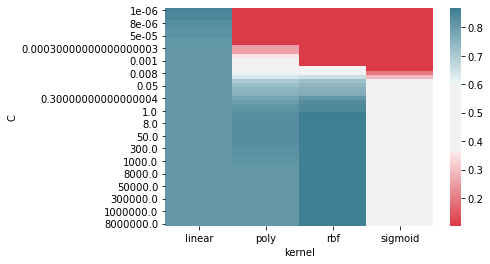

In [9]:
data = results.pivot('C', 'kernel', 'accuracy')
cmap = sns.diverging_palette(10, 220, sep=80, n=10000)
ax = sns.heatmap(data, cmap=cmap)